# Randomness and random number generation

This notebook introduces Numpy methods for generating random numbers and at the end shows how you might approach this for use on your Homework #3.

As usual, let's get some packages:

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# nicely render figures in the notebook 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# you can omit the line below if you'd like, but I really don't like the default fonts in Python, so I switch to Helvetica
plt.rcParams['font.family'] = 'Helvetica'

### Brownian motion

As a simple demonstration of the power of randomness, here we create a (very) simple calculate of Brownian motion. In the code below, each coordinate $,x_{t},y_{t}$ at each moment $t$ is calculated simply as the cumulative sum of the randomly generated points.  In otherwords, each subsequent point in the 2-dimensional space below is definied by the previous point plus some random additional movement, drawing from a normal distribution.  If you run this a few times, you can see that you can generate vastly different behaviors despite similar starting conditions and simple rules. 

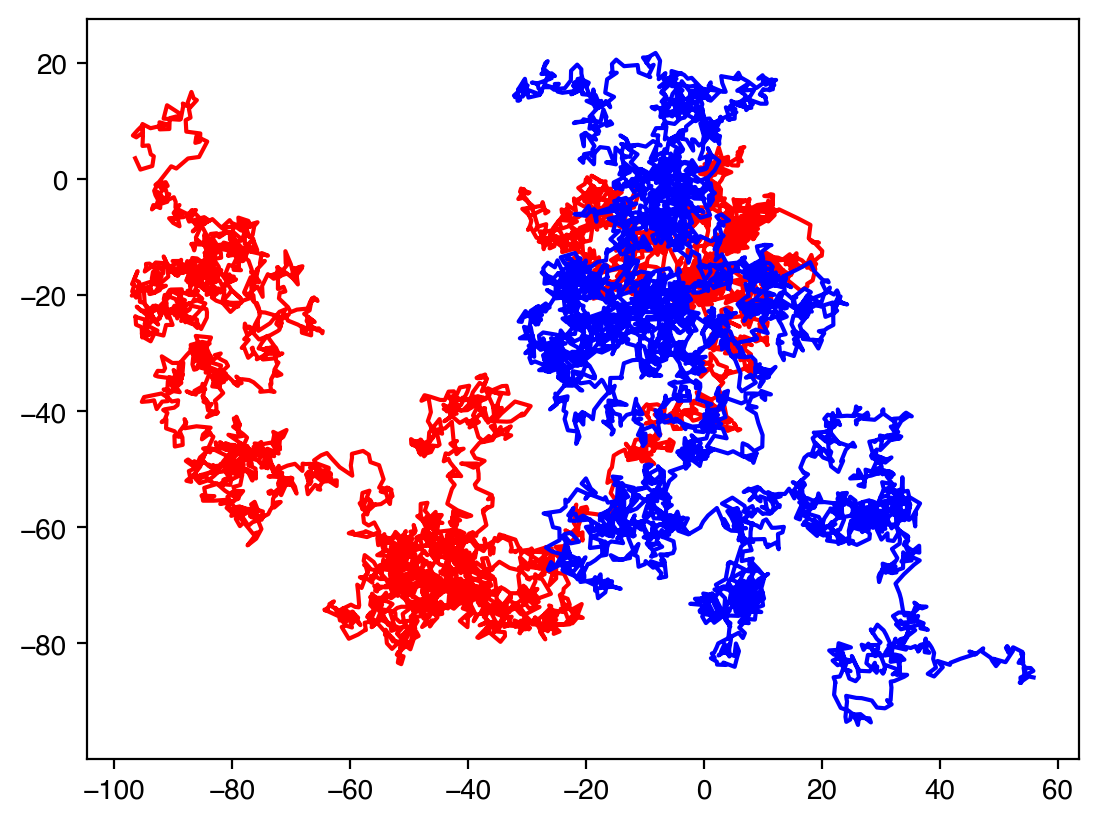

In [2]:
n = 5000

x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n))

x2 = np.cumsum(np.random.randn(n))
y2 = np.cumsum(np.random.randn(n))

plt.plot(x,y,color='red')
plt.plot(x2,y2,color='blue')

In lecture over the next two days we'll look at other examples of the potential power of random behavior to look like something with greater complexity, causality, or meaning.  For now it suffices to say that what we will need going forward in our empirical analyses are techniques to help us separate stochastic behavior from the patterns that might be meaningful, significant, interpretable, and/or useful. 

## Generating random numbers in Numpy

Numpy has extensive functions for generating random numbers or permutations of numbers for our use.  [Real Python has a useful description here](https://realpython.com/numpy-random-number-generator/) as well as a description of the challenges and mechanics of generating random numbers (both more important and less trivial than you might imagine!). For the Numpy user manual, you can start [here](https://numpy.org/doc/stable/reference/random/index.html). Numpy actually [now recommends](https://numpy.org/doc/stable/reference/random/index.html) a two-step process -- first, calling the [Generator](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) e.g. `rng = np.random.default_rng()` and then using `rng` (the output of the Generator) to call the specific distributions you might want to use.  In what follows below, I use the (apparently) outdated approach of calling `random` directly from Numpy. 

Note that random number generation is, in most cases, _pseudorandom_ number generation.   The `rng = np.random.default_rng()` allows you to set a 'seed' for the random number generator (or, the default is to take some numbers from your operating system).  As Numpy [says](https://numpy.org/doc/stable/reference/random/index.html):
> 'Our RNGs are deterministic sequences and can be reproduced by specifying a seed integer to derive its initial state. By default, with no seed provided, default_rng will create seed the RNG from nondeterministic data from the operating system and therefore generate different numbers each time. The pseudo-random sequences will be independent for all practical purposes, at least those purposes for which our pseudo-randomness was good for in the first place.'


Let's say we wanted to draw randomly from a range of integers.  Numpy provides `random.randint` for this purpose, allowing us to supply a lower bounds, upper bounds, and the size of the random array we want to generate:

In [3]:
# random.randint(low, high=None, size=None)
np.random.randint(1, 10, size=(10))

array([2, 3, 4, 9, 2, 5, 3, 1, 3, 4])

We will frequently make use of the ability to draw random values from a normal distribution.  Numpy provides two ways to do this.  The first, `randn` is a hold-over from MATLAB itself, and takes as input the dimensions of the random number array you wish to generate.  Note that `randn` assume a zero mean and scale=1 (standard deviation of 1). 

In [4]:
# random.randn(d0, d1, ..., dn)
np.random.randn(5,2)

array([[ 1.25539495,  1.31396956],
       [-0.08921758, -0.49559035],
       [ 0.42993765, -0.75890534],
       [ 0.32818371,  0.00613693],
       [-1.11828343, -1.73014542]])

Alternatively, Numpy supplies `.standard_normal` for this purpose:

In [5]:
np.random.standard_normal((5,2))

array([[-0.30342962, -0.16009527],
       [-0.30535483,  0.8699245 ],
       [-1.32249284,  0.63682419],
       [ 0.11548155, -0.12306302],
       [-1.77555548, -0.52116638]])

We will often want to draw random numbers from a normal distribution with a different mean and standard deviation.  For this purpose we can use `.normal` and specify mean and standard deviation, as well as the size of the random array:

In [6]:
# random.normal(mean=0.0, standard deviation=1.0, size=None)
mu = 3
scale = 0.5
np.random.normal(mu,scale,(5,2))

array([[3.66163447, 2.4468466 ],
       [3.06221284, 3.19747411],
       [2.13622352, 2.64795177],
       [2.44227155, 2.73191355],
       [3.17622113, 2.19557135]])

We can also draw from a uniform distribution, where the probability of every value is equally likely (unlike normal distributions where values close to the mean are more likely that those out in the tails of the distribution).  For this we use `.random.uniform`:

In [7]:
# random.uniform(low=0.0, high=1.0, size=None)
np.random.uniform(1,10,10)

array([4.85076541, 4.77632911, 8.5795476 , 9.44895081, 7.27684693,
       7.27829976, 4.98358455, 8.16206368, 7.21021872, 5.97264775])

We can also have Numpy draw from a list of numbers of our chosing.  In the example below, we use `.random.choice` and we can elect to have the draws from our list of numbers be 'with replacement' (e.g. the number is drawn from the list but then 'put back' and can be drawn again):

In [8]:
# random.choice(a, size=None, replace=True, p=None)
np.random.choice(np.array([2,4,6]),10,replace=True)

array([6, 2, 6, 6, 2, 2, 4, 6, 4, 6])

Similar to chosing a number, we can ask Numpy to randomize or `shuffle` an array.  Note that `.random.shuffle` changes the value of the array _in place_, even if you don't designate an output variable:

In [9]:
a = np.array([1, 2, 3, 4, 5, 6])
print(np.random.shuffle(a))
a

None


array([1, 2, 5, 3, 6, 4])

Similar  `shuffle` is `.random.permutation`.  It performs similarly but unlike  `.random.shuffle` is does not change the value of the array itself, and leaves you to designate an output variable:

In [10]:
a = np.array([1, 2, 3, 4, 5, 6])
print(np.random.permutation(a))
a

[4 5 1 3 6 2]


array([1, 2, 3, 4, 5, 6])

## An application to real data

Below, I'll read in the cereal data from Homework #3.  The code block below demonstrate how you might iteratively (repeatedly) generate a new random array with the mean and standard deviation in the original columns of your data (although, recall in the Homework that you'll be centering and scaling by the standard deviation, so your data matrix should be approximately normal when doing your EOF operations!).  In the loop below, I've simply generated the random matrix in the look, but you could also do the covariance and SVD calculations in the loop. 

In [11]:
df = pd.read_excel('cereal_production_WB_FAO_2022.xlsx',index_col=[0])

# index to those columns with complete data
all_available = df.isnull().sum()==0

# downsample the dataframe to only those columns that are complete
cereals = df.loc[:,all_available].copy()

# how many times to run through the random generation loop? 
iterations = 10

# loop over iterations, generate random matrix x with mean and standard deviation from the columns of your data
for i in range(iterations):
    x = np.random.normal(cereals.values.mean(axis=0),cereals.values.std(axis=0),cereals.values.shape)
    


As a sanity check, we can quickly scatter plot the mean values from each column of the last randomly generated $x$ matrix and the mean values of each column of the dataframe with the original data.  We add a one-to-one line so that we can visually compare them.  What you'll see if that the points fall more-or-less on the one-to-one line, with some small deviations.  What might explain why the mean values of this one random matrix and the data matrix are not identical? 

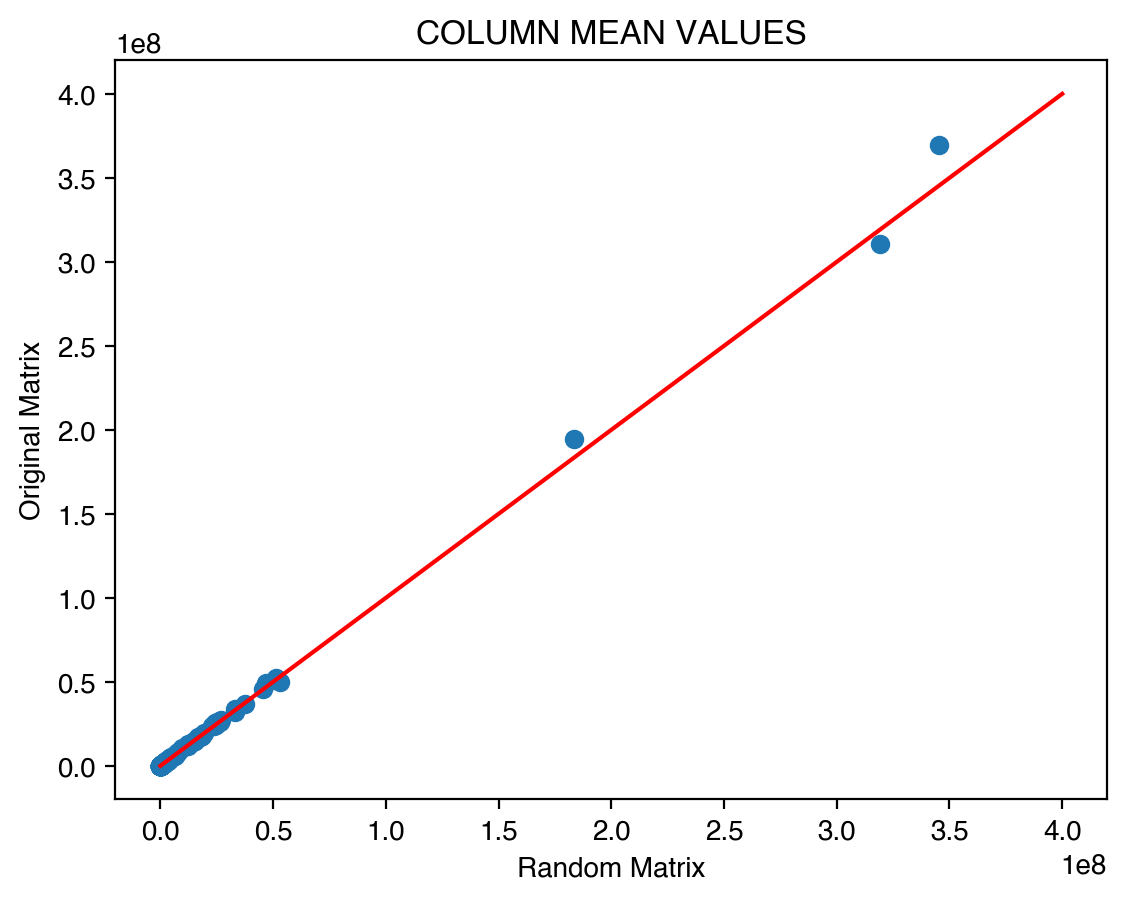

In [12]:
plt.scatter(x.mean(axis=0),cereals.values.mean(axis=0))
plt.plot([0, 400000000],[0, 400000000],color="red")
plt.xlabel('Random Matrix')
plt.ylabel('Original Matrix')
plt.title('COLUMN MEAN VALUES')
plt.show()

We can make the same plot but with the standard deviations.   Again, we add a one-to-one line so that we can visually compare them.  What you'll see if that the points fall more-or-less on the one-to-one line, with some small deviations.  What might explain why the standard deviations values of this one random matrix and the data matrix are not identical? 

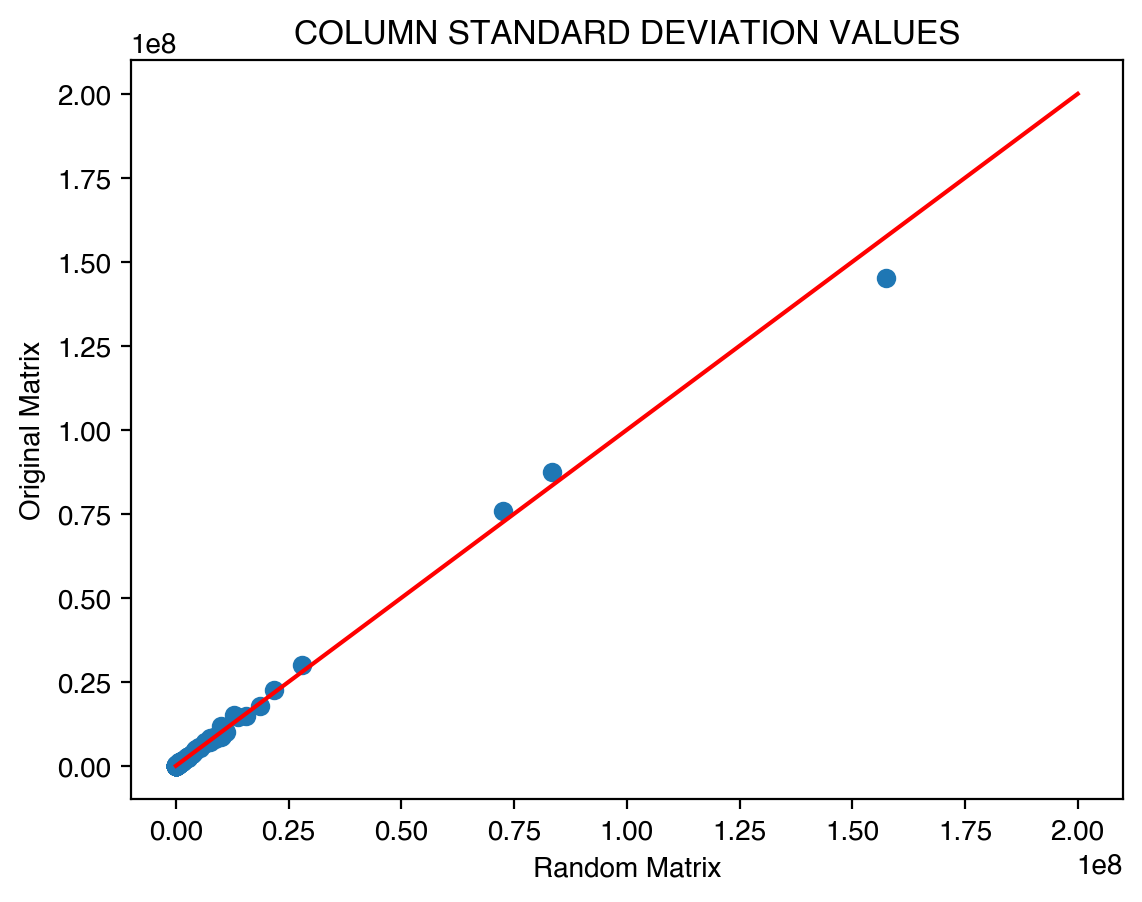

In [13]:
plt.scatter(x.std(axis=0),cereals.values.std(axis=0))
plt.plot([0, 200000000],[0, 200000000],color="red")
plt.xlabel('Random Matrix')
plt.ylabel('Original Matrix')
plt.title('COLUMN STANDARD DEVIATION VALUES')
plt.show()

The final demonstration is how you might retrieve and store values from functions or calculations executed in a loop for later use.  This is **not** precisely what you'll need to do in Homework #3, but it shows one way you can keep arrays being generated within an iterative for loop for later.  

First, we generate an empty matrix which has dimensions of our cereal data plus an added third dimension - the number of iterations (and therefore random matrices generated) as we loop though.  Because `.shape` is returned as a tuple, which is immutable, we have to use the following syntax:

> `cereals.shape + (iterations,)`

In the example below then, I first call `np.full`, which returns a matrix of a given size filled with something.  The first entry in the function is the size of the resulting filled matrix - this takes the 2 elements in the `.shape` tuple and on the fly creates a new 3 element tuple with the number of iterations (which is an integer type) attached as a third element to the new tuple.  The parentheses and the comma allow the iterations integer to become a tuple element.   The second term in the function is what we want the matrix filled with - here, I designate `np.nan` so that the array `x_all` is now a three dimensional matrix filled with NaNs and with row and columns from the cereal data values and a 3rd dimension which is the size of the number of iterations through the loop:

In [14]:
# create an array full of NaN values to acccept the random matrices - note the use of cereals.shape + (iterations,) which is adding a dimension to the tuple of the size of teh original matrix
x_all = np.full(cereals.shape + (iterations,),np.nan)

for i in range(iterations):
    x = np.random.normal(cereals.values.mean(axis=0),cereals.values.std(axis=0),cereals.values.shape)
    x_all[:,:,i] = x
    
x_all.shape # check it out

(61, 145, 10)